<a href="https://colab.research.google.com/github/DeepankTyagi2001/Cricket_World_Cup_Tweet_Analysis/blob/main/Cricket_World_Cup_Tweet_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [98]:
#For Handling Data
import pandas as pd
import numpy as np

#for tracking executions
from tqdm import tqdm

#For Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

#For Text Analysis
import re
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
import json
import string
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
from nltk.corpus import stopwords
import nltk

# For Training Machine learning Model
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Loading The Dataset

In [99]:
T20_tweets_data= pd.read_excel("/content/drive/MyDrive/Mentorness/Copy of T20_Worldcup_tweets.xlsx")

In [100]:
T20_tweets_data.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,Prabhudatta Nayak🇮🇳,"Balangir, India",Proud to be an Indian ll #contestlover ll #bor...,21/05/10 11:05,134.0,532.0,6625.0,0.0,22/10/21 23:55,@ManappuramMAFIL Done Team \n@ManappuramMAFIL ...,"['GuessAndWin', 'T20WorldCup', 'Contest', 'Cri...",Twitter for Android,0.0
1,Archisman Mishra,"Bhubaneshwar, India","RISING FROM THE ASHES ENGINEER,GAMER,FOODY,POK...",10/12/15 18:43,656.0,762.0,5286.0,0.0,22/10/21 23:55,Set a reminder for my upcoming Space! https://...,"['T20WorldCup', 'AUSvSA']",Twitter for Android,0.0
2,T20 World Cup,NaN,Official account of the ICC T20 World Cup. Men...,19/04/18 12:46,378202.0,1097.0,296.0,1.0,22/10/21 23:55,"""We just try to enjoy everything that we do.""\...","['WestIndies', 'T20WorldCup']",Khoros Publishing App,0.0
3,Farid Khan,"Lahore, Pakistan",Journalist. Head of Digital Media @_cricingif ...,25/07/21 3:59,1125.0,424.0,56.0,0.0,22/10/21 23:54,#Pakistan and #India played each other in open...,"['Pakistan', 'India', 'IND', 'T20WorldCup', 'NZ']",Twitter Web App,0.0
4,Bimal Mirwani,Hong Kong,I write all about Pakistan cricket on my site ...,01/03/14 20:41,742.0,1433.0,811.0,0.0,22/10/21 23:49,#Pakistan won't be much of a challenge for #In...,"['Pakistan', 'India', 'Agarkar', 'AjitAgarkar'...",Twitter Web App,0.0


# Data Preprocessing

In [101]:
#size of data
T20_tweets_data.shape

(430383, 13)

In [102]:
#getting information about the data
T20_tweets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430383 entries, 0 to 430382
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_name         430014 non-null  object 
 1   user_location     323089 non-null  object 
 2   user_description  400116 non-null  object 
 3   user_created      430381 non-null  object 
 4   user_followers    430380 non-null  float64
 5   user_friends      430380 non-null  float64
 6   user_favourites   430380 non-null  float64
 7   user_verified     430380 non-null  float64
 8   date              430380 non-null  object 
 9   text              430380 non-null  object 
 10  hashtags          429971 non-null  object 
 11  source            430379 non-null  object 
 12  is_retweet        430379 non-null  float64
dtypes: float64(5), object(8)
memory usage: 42.7+ MB


In [103]:
#getting statistical information about the data
T20_tweets_data.describe()

,user_followers,user_friends,user_favourites,user_verified,is_retweet
count,4.303800e+05,4.303800e+05,4.303800e+05,430380.000000,430379.0
mean,1.207146e+05,9.925014e+02,1.584478e+04,0.099535,0.0
std,9.041489e+05,5.355857e+03,3.728272e+04,0.299380,0.0
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,6.600000e+01,1.140000e+02,4.110000e+02,0.000000,0.0
50%,3.490000e+02,3.540000e+02,3.066000e+03,0.000000,0.0
75%,1.985000e+03,8.900000e+02,1.387300e+04,0.000000,0.0
max,1.936281e+07,1.421189e+06,1.299178e+06,1.000000,0.0


In [104]:
# checking number of null values in each column
T20_tweets_data.isna().sum()

user_name              369
user_location       107294
user_description     30267
user_created             2
user_followers           3
user_friends             3
user_favourites          3
user_verified            3
date                     3
text                     3
hashtags               412
source                   4
is_retweet               4
dtype: int64

In [105]:
#checking the value counts in "is_retweet" column
T20_tweets_data.is_retweet.value_counts()

0.0    430379
Name: is_retweet, dtype: int64

"is_retweet contains 0 in almost every record,hence we cannot extract valuable information from it"

In [106]:
T20_tweets_data.user_description.value_counts(ascending=True)

Proud to be an Indian ll #contestlover ll #borntowin ll #winner ll 🙏🇮🇳Jai Hind🇮🇳🙏                                                                                      1
#म #मराठी #क्रिकेट ~~ 💙                                                                                                                                                1
22|AFC 🇵🇸                                                                                                                                                              1
Too many subscriptions! But nothing to watch / hear :( !                                                                                                               1
Living grad life @ucsbcs • Previously Engineering @PhonePe_                                                                                                            1
                                                                                                                                                           

In [107]:
#copying the whole dataset
t_data= T20_tweets_data.copy()

In [108]:
#removing null values from the dataset
t_data.dropna(inplace=True)

In [109]:
#dataset information after removing null values
t_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 308547 entries, 0 to 430382
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_name         308547 non-null  object 
 1   user_location     308547 non-null  object 
 2   user_description  308547 non-null  object 
 3   user_created      308547 non-null  object 
 4   user_followers    308547 non-null  float64
 5   user_friends      308547 non-null  float64
 6   user_favourites   308547 non-null  float64
 7   user_verified     308547 non-null  float64
 8   date              308547 non-null  object 
 9   text              308547 non-null  object 
 10  hashtags          308547 non-null  object 
 11  source            308547 non-null  object 
 12  is_retweet        308547 non-null  float64
dtypes: float64(5), object(8)
memory usage: 33.0+ MB


In [110]:
#checking number of duplicate values in the data
t_data.duplicated().sum()

0

In [111]:
#counting number of tweets location-wise
t_data.user_location.value_counts()

India                             21217
Pakistan                          14522
New Delhi, India                   9100
Islamabad, Pakistan                9023
Karachi, Pakistan                  8460
                                  ...  
Southern Ocean                        1
Beyond the wall                       1
BAHAWALPUR,Pakistan                   1
mentalynspiritualy in karbala❤        1
اسکی گہری،سیاہ،تاریک آنکھوں سے        1
Name: user_location, Length: 20113, dtype: int64

locations are having multiple formats in the "user_location" data

In [112]:
# number of unique location values
len(t_data.user_location.value_counts())

20113

In [113]:
# Converting the 'date' column to datetime format
t_data['date'] = pd.to_datetime(t_data['date'])

In [114]:
t_data["user_location"]

0                        Balangir, India
1                    Bhubaneshwar, India
3                       Lahore, Pakistan
4                              Hong Kong
5                           Afghanistan 
                       ...              
430374                  Saket, New Delhi
430378                  Hyderabad, India
430380                  New Delhi, India
430381              Rawalpindi, Pakistan
430382    couch pe let kar tweet karru. 
Name: user_location, Length: 308547, dtype: object

In [115]:
p_data= t_data.copy()

In [116]:
#replacing user's location in "user_location" column with country name
pattern=r",(.*)"
for index in  tqdm(p_data.index):
  loc= p_data["user_location"][index]
  try:
    new_loc= re.findall(pattern,loc)[0][1:]
    t_data["user_location"][index]=new_loc
  except:
    continue

  0%|          | 0/308547 [00:00<?, ?it/s]<ipython-input-116-b3415dc9a88a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t_data["user_location"][index]=new_loc
100%|██████████| 308547/308547 [08:19<00:00, 617.62it/s]


In [117]:
t_data["user_location"]

0                                  India
1                                  India
3                               Pakistan
4                              Hong Kong
5                           Afghanistan 
                       ...              
430374                         New Delhi
430378                             India
430380                             India
430381                          Pakistan
430382    couch pe let kar tweet karru. 
Name: user_location, Length: 308547, dtype: object

Some records don't have country name, instead they have state only, this can be fixed by entering values manually

In [118]:
# Value-wise count of source of tweets
t_data["source"].value_counts()

Twitter for Android             175474
Twitter Web App                  54870
Twitter for iPhone               54730
TweetDeck                        12339
Twitter for Advertisers.          1421
                                 ...  
Woofy Social Media Scheduler         1
Ryzely                               1
Sked Social                          1
Poster-app                           1
PlayStation®Network                  1
Name: source, Length: 146, dtype: int64

In [119]:
# count of unique sources
t_data["source"].nunique()

146

# Exploratory Data Analysis

In [120]:
# Top 20 users with most number of tweets
Most_Tweet_Users= t_data['user_name'].value_counts().head(20)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127951 (\N{CRICKET BAT AND BALL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


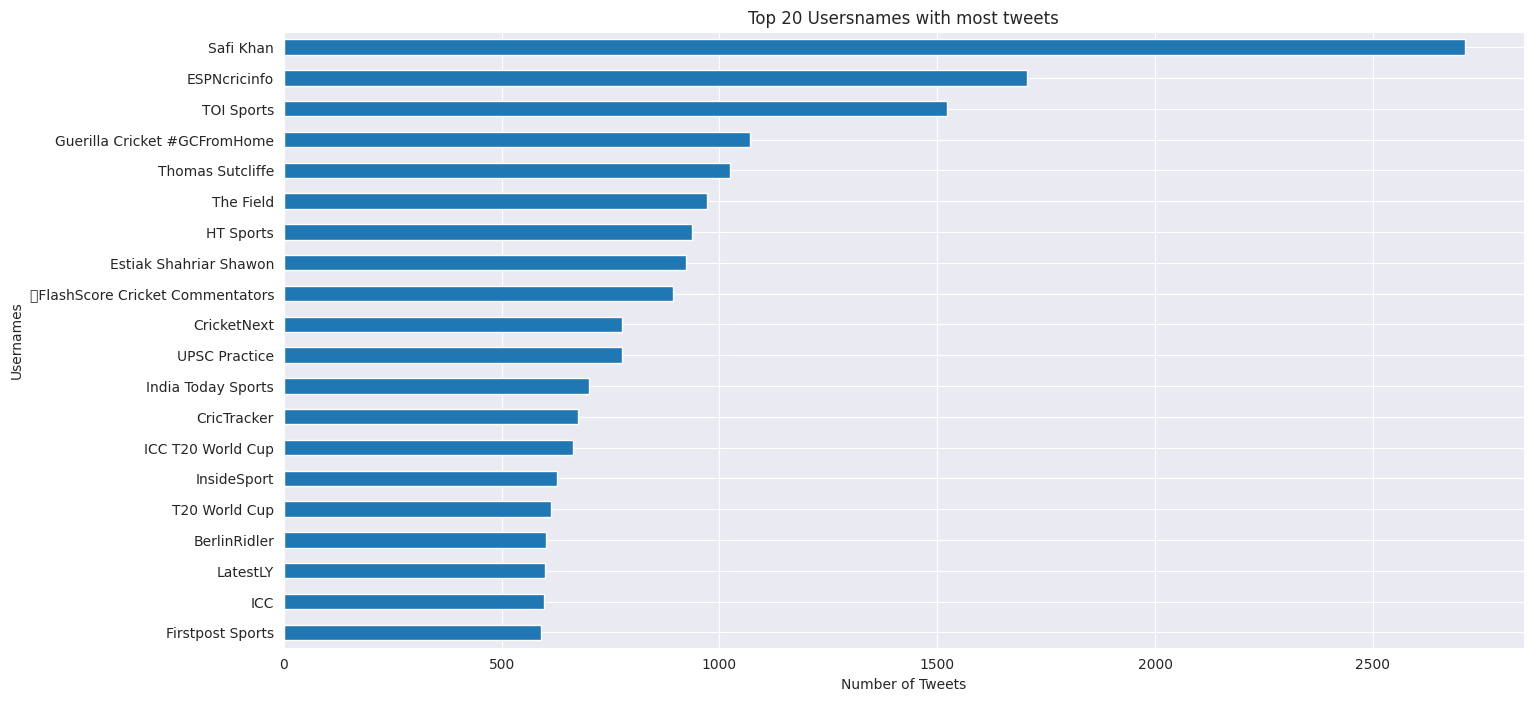

In [121]:
# Visualizing Most_Tweet_Users
plt.figure(figsize=(16, 8))

Most_Tweet_Users.sort_values(ascending=True).plot(kind='barh')

plt.title('Top 20 Usersnames with most tweets')
plt.ylabel('Usernames')
plt.xlabel('Number of Tweets')

plt.show()

In [122]:
# counting Top 20 countries with most number of tweets
country=t_data["user_location"].value_counts().head(20).sort_values(ascending=True)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2349 (\N{DEVANAGARI LETTER BHA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2366 (\N{DEVANAGARI VOWEL SIGN AA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2352 (\N{DEVANAGARI LETTER RA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2340 (\N{DEVANAGARI LETTER TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


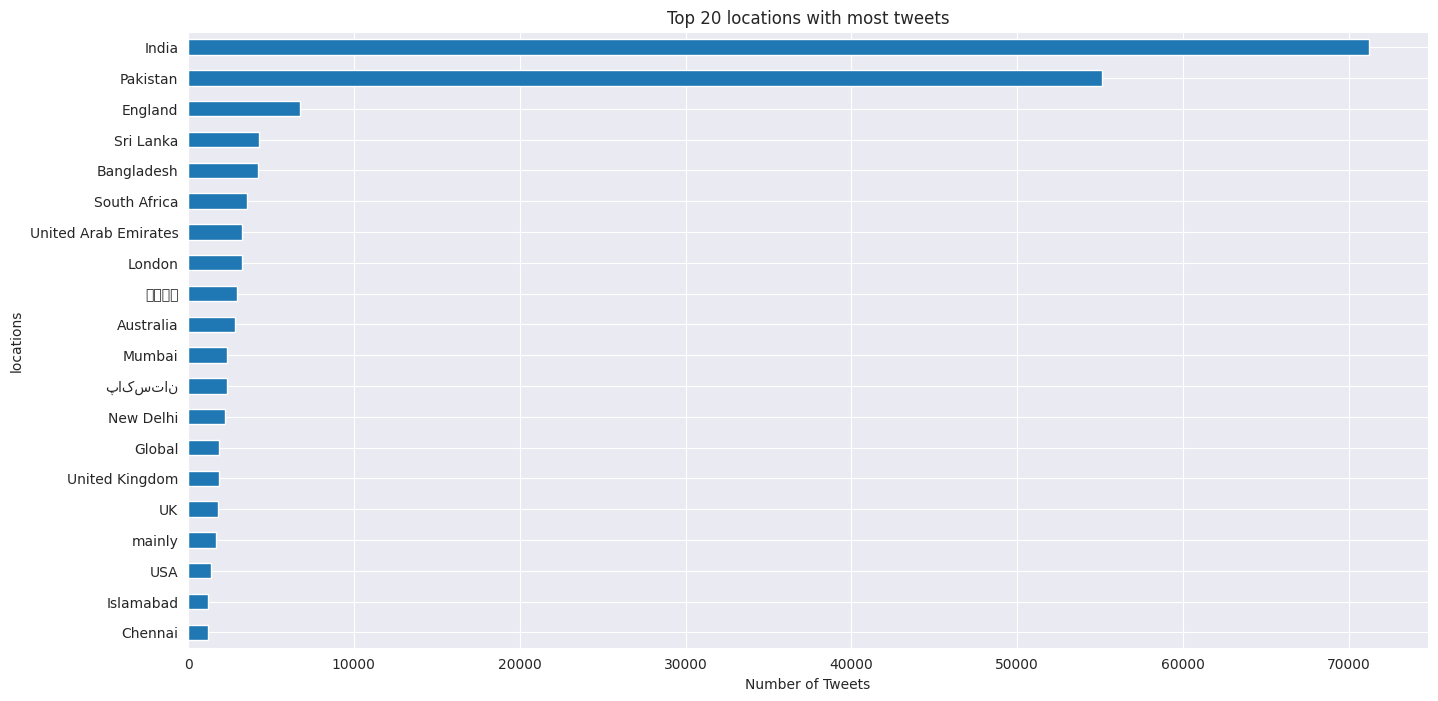

In [123]:
# Visualizing Top 20 countries with most number of tweets
plt.figure(figsize=(16, 8))

country.plot(kind='barh')

plt.title('Top 20 locations with most tweets')
plt.ylabel('locations')
plt.xlabel('Number of Tweets')

plt.show()

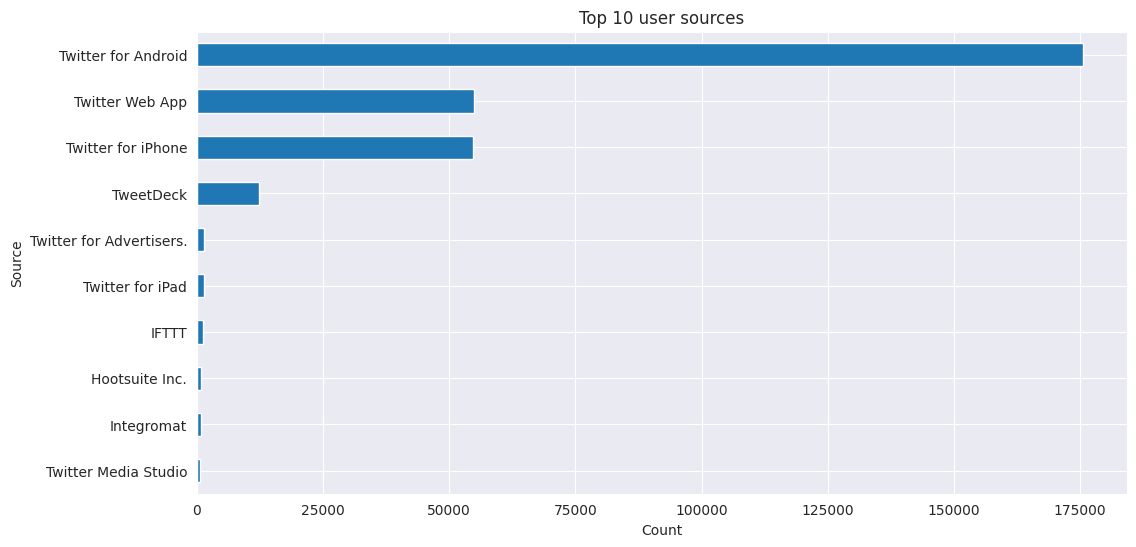

In [124]:
# Visualizing Top 10 Sources of Most Tweets
plt.figure(figsize=(12, 6))
t_data['source'].value_counts().head(10).sort_values(ascending=True).plot(kind='barh')
plt.title('Top 10 user sources')
plt.ylabel('Source')
plt.xlabel('Count')
plt.show()

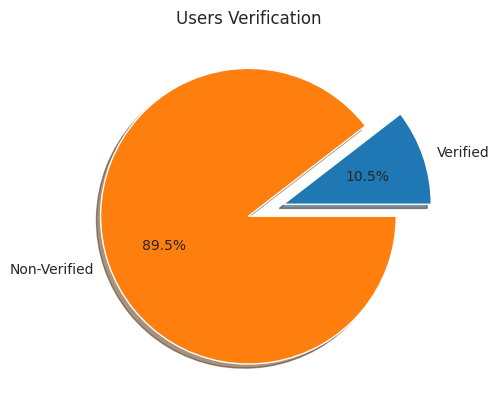

In [125]:
# Visualizing the number of verified and not verified users
verified_count = t_data['user_verified'].sum()
non_verified_count = len(t_data) - verified_count
labels = ['Verified', 'Non-Verified']
sizes = [verified_count, non_verified_count]
plt.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True,explode=(0.25,0))
plt.title('Users Verification')
plt.show()

In [126]:
import ast
hashtags= [tag for lst in t_data["hashtags"] for tag in ast.literal_eval(lst)]


In [127]:
hashtags

['GuessAndWin',
 'T20WorldCup',
 'Contest',
 'CricketFever',
 'T20Contest',
 'ExicitingPrizes',
 'UnlockWithManappuram',
 'ManappuramFinance',
 'T20WorldCup',
 'AUSvSA',
 'Pakistan',
 'India',
 'IND',
 'T20WorldCup',
 'NZ',
 'Pakistan',
 'India',
 'Agarkar',
 'AjitAgarkar',
 'T20WorldCup',
 'PAKvIND',
 'INDvPAK',
 'INDvsPAK',
 'PAKvsIND',
 'Cricket',
 'IndvsPak',
 'INDvPAK',
 'T20WorldCup',
 'INDvPAK',
 'T20WorldCup',
 'T20WorldCup',
 'SaitamaWolfPack',
 'saitama',
 'Bitcoin',
 'BNB',
 'BSCGems',
 'cryptocurrencies',
 'CoinMarketCap',
 'DeFi',
 'Evergrande',
 'Ethereum',
 'FLOKI',
 'T20WorldCup',
 'Rockwithyou',
 'T20WorldCup',
 'PakVsInd',
 'T20WorldCup',
 'T20WorldCup2021',
 'Cricket',
 'ICC',
 'BCCI',
 'CEAT',
 'CEATTyres',
 'RPGGroup',
 'Zoggy',
 'RPGEnterprises',
 'Way2winin',
 'Australia',
 'SouthAfrica',
 'AUSvSA',
 'T20WorldCup',
 'CricketTwitter',
 'T20WorldCupsquad',
 'Namibia',
 'T20WorldCup',
 'T20WorldCup2021',
 'CricketTwitter',
 'CricketNamibia',
 'T20WorldCup',
 'Cricke

In [128]:
t_data["hashtags"][0]

"['GuessAndWin', 'T20WorldCup', 'Contest', 'CricketFever', 'T20Contest', 'ExicitingPrizes', 'UnlockWithManappuram', 'ManappuramFinance']"

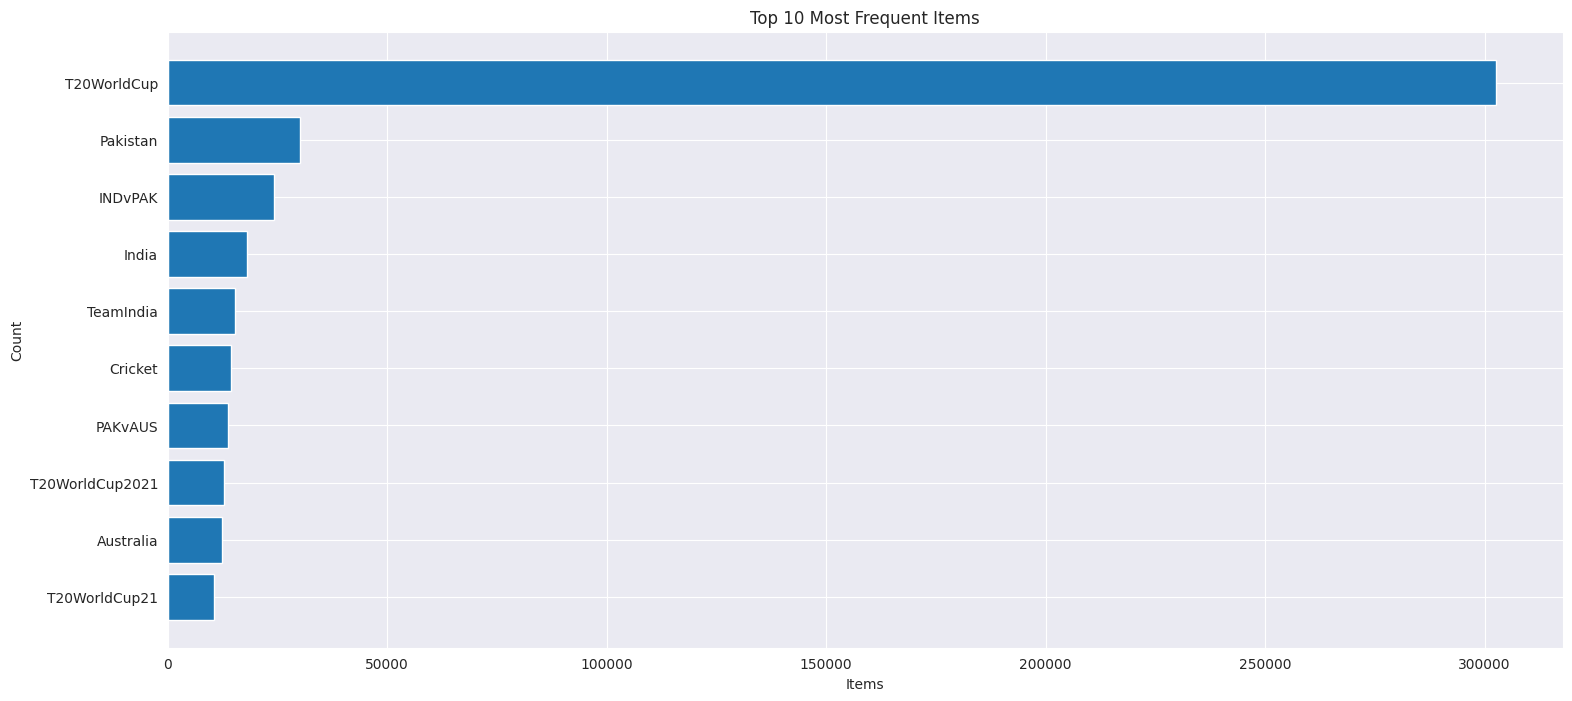

In [129]:
# Visualizing Top 10 Most used Hashtags
hashtag_counts = Counter(hashtags).most_common(10)[::-1]
items, counts = zip(*hashtag_counts)

plt.figure(figsize=(18,8))

plt.barh(items, counts)
plt.xlabel('Items')
plt.ylabel('Count')
plt.title('Top 10 Most Frequent Items')
plt.show()

# Text Analysis

In [130]:
# username wise number of tweets
T20_tweets_data["user_name"].value_counts()

Safi Khan            2711
T20 World Cup        1760
ESPNcricinfo         1707
TOI Sports           1523
CricWick             1199
                     ... 
UsAma                   1
Shahid Imran Khan       1
Eqrash                  1
Haroon Said             1
Hassan🇵🇰                1
Name: user_name, Length: 91466, dtype: int64

# Text Analysis

creating a pipeline to remove punctuations and then do sentiment analysis and storing it in the same dataset:

In [131]:
# removing punctuations and links from tweets
def preprocess_text(text):
    # Remove special characters and links
    text = re.sub(r'http\S+|www\S+|https\S+|[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    return text

t_data['cleaned_text'] = t_data['text'].apply(preprocess_text)

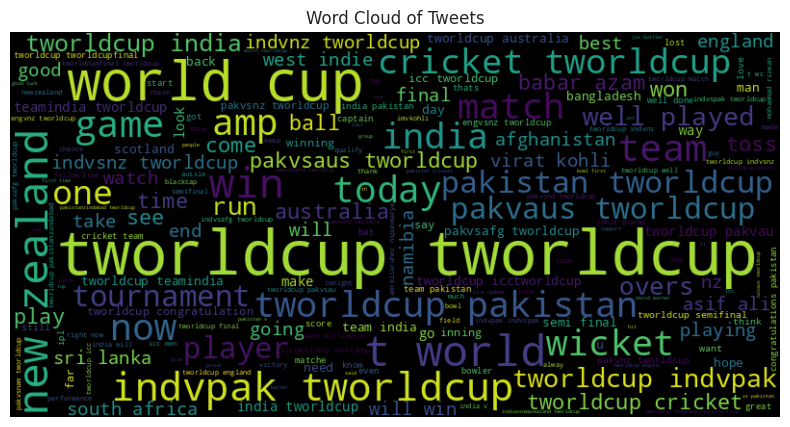

In [132]:
# Combine all cleaned text data into a single string
text_corpus = ' '.join(t_data['cleaned_text'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text_corpus)

# Visualizing the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Tweets')
plt.axis("off")
plt.show()

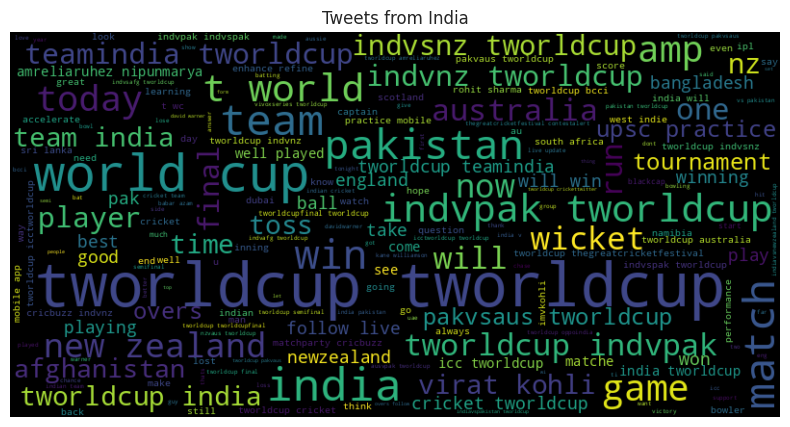

In [133]:
# Filter the DataFrame to select tweets with user location set as "India"
india_df = t_data.loc[t_data.user_location=="India"]

# Combine all cleaned text data into a single string
text_corpus = ' '.join(india_df['cleaned_text'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text_corpus)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Tweets from India')
plt.axis("off")
plt.show()

# Sentiment Analysis


In [134]:
def analyze_sentiment(text):
    # Create a TextBlob object to analyze sentiment
    analysis = TextBlob(text)

    # Determine sentiment based on polarity
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis function to each text and create a 'sentiment' column
t_data['sentiment'] = t_data['cleaned_text'].apply(analyze_sentiment)

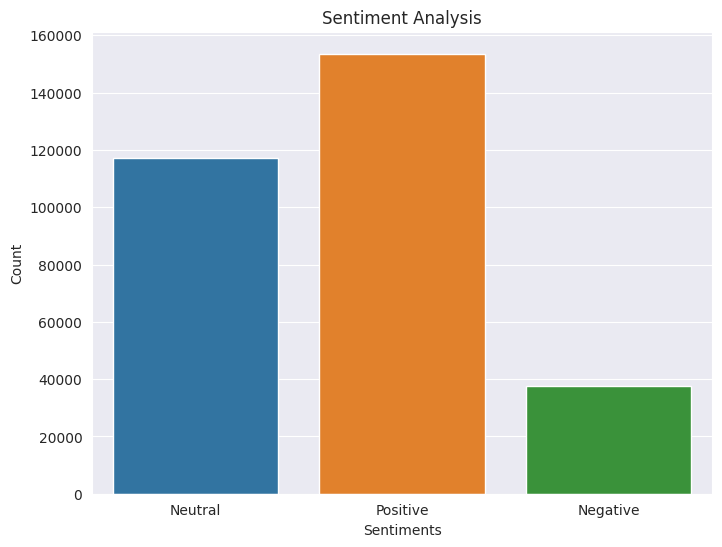

In [135]:
# Set the plotting style
sns.set_style('darkgrid')

# Create a countplot to visualize the distribution of sentiments
plt.figure(figsize=(8,6))
sns.countplot(x='sentiment', data=t_data)
plt.title('Sentiment Analysis')
plt.xlabel('Sentiments')
plt.ylabel('Count')
plt.show()

# Training Model

In [136]:
# Train Test Split
xtrain,xtest,ytrain,ytest=train_test_split(t_data['cleaned_text'], t_data['sentiment'], test_size=0.2, random_state=21)

In [137]:
# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xtest_tfidf = tfidf_vectorizer.transform(xtest)

In [138]:
# Training Logistic Regression Model
model=LogisticRegression(max_iter=1000)
model.fit(xtrain_tfidf, ytrain)

LogisticRegression(max_iter=1000)

In [139]:
# Make predictions on the test set
pred = model.predict(xtest_tfidf)
pred[:30]

array(['Positive', 'Neutral', 'Positive', 'Negative', 'Positive',
       'Positive', 'Positive', 'Positive', 'Neutral', 'Neutral',
       'Neutral', 'Neutral', 'Negative', 'Neutral', 'Neutral', 'Neutral',
       'Neutral', 'Neutral', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Neutral', 'Positive', 'Positive',
       'Neutral', 'Positive', 'Positive', 'Positive'], dtype=object)

In [140]:
# Training and Testing Accuracy
train=model.score(xtrain_tfidf,ytrain)
test=model.score(xtest_tfidf,ytest)
print(train)
print(test)

0.9653496031794261
0.960119915734889


# Model Evaluation

In [141]:
# Evaluate the model
accuracy=accuracy_score(ytest,pred)
matrix=confusion_matrix(ytest,pred)
report=classification_report(ytest,pred)

print(f' Accuracy of trained model is : {accuracy}')
print('-'*60)
print(f' Matrix:\n {matrix}')
print('-'*60)
print(f' Report:\n {report}')
print('--'*30)

 Accuracy of trained model is : 0.960119915734889
------------------------------------------------------------
 Matrix:
 [[ 6180   496   874]
 [   67 23211   161]
 [  411   452 29858]]
------------------------------------------------------------
 Report:
               precision    recall  f1-score   support

    Negative       0.93      0.82      0.87      7550
     Neutral       0.96      0.99      0.98     23439
    Positive       0.97      0.97      0.97     30721

    accuracy                           0.96     61710
   macro avg       0.95      0.93      0.94     61710
weighted avg       0.96      0.96      0.96     61710

------------------------------------------------------------


In [142]:
t_data.info()  #list of final columns in the dataset after text and sentiment analysis

<class 'pandas.core.frame.DataFrame'>
Int64Index: 308547 entries, 0 to 430382
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_name         308547 non-null  object        
 1   user_location     308547 non-null  object        
 2   user_description  308547 non-null  object        
 3   user_created      308547 non-null  object        
 4   user_followers    308547 non-null  float64       
 5   user_friends      308547 non-null  float64       
 6   user_favourites   308547 non-null  float64       
 7   user_verified     308547 non-null  float64       
 8   date              308547 non-null  datetime64[ns]
 9   text              308547 non-null  object        
 10  hashtags          308547 non-null  object        
 11  source            308547 non-null  object        
 12  is_retweet        308547 non-null  float64       
 13  cleaned_text      308547 non-null  object        
 14  sent